In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import *
from wordcloud import WordCloud, STOPWORDS
import nltk
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
    #nltk.download()

In [3]:
url = '~/github/br-microalgal-p1/data/'

In [4]:
df_data1 = pd.read_csv(url+'d_1.csv', sep=';')
df_data2 = pd.read_csv(url+'ref_1.csv', sep=';')

In [5]:
df_data1.head()

,Título,Autores,Autorias compartilhadas,Editores,Editores de livros,Título da fonte,Data de publicação,Ano da publicação,Volume,Edição,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Comparative energy life-cycle analyses of micr...,"Jorquera, Orlando; Kiperstok, Asher; Sales, Em...",NaN,NaN,NaN,BIORESOURCE TECHNOLOGY,FEB 2010,2010,101.0,4,...,32,47,55,42,50,47,51,51,48,1
1,Microalgae as feedstock for biodiesel producti...,"Francisco, Erika C.; Neves, Debora B.; Jacob-L...",NaN,NaN,NaN,JOURNAL OF CHEMICAL TECHNOLOGY AND BIOTECHNOLOGY,MAR 2010,2010,85.0,3,...,23,27,24,32,40,34,24,42,33,0
2,Potential carbon dioxide fixation by industria...,"Sydney, Eduardo Bittencourt; Sturm, Wilerson; ...",NaN,NaN,NaN,BIORESOURCE TECHNOLOGY,AUG 2010,2010,101.0,15,...,14,18,33,34,36,30,18,35,25,0
3,Screening Microalgae Strains for Biodiesel Pro...,"Nascimento, Iracema Andrade; Izabel Marques, S...",NaN,NaN,NaN,BIOENERGY RESEARCH,MAR 2013,2013,6.0,1,...,0,8,18,33,27,36,26,36,38,3
4,Isolation and selection of microalgae from coa...,"de Morais, Michele Greque; Vieira Costa, Jorge...",NaN,NaN,NaN,ENERGY CONVERSION AND MANAGEMENT,JUL 2007,2007,48.0,7,...,13,23,20,18,28,26,17,17,19,1


In [6]:
df_data2.head()

,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,Number of Pages,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export
0,J,"Jorquera, O| Kiperstok, A| Sales, EA| Embirucu...","Jorquera, Orlando| Kiperstok, Asher| Sales, Em...",Comparative energy life-cycle analyses of micr...,BIORESOURCE TECHNOLOGY,English,Article,Photobioreactors| Oil production| Microalgae| ...,MASS CULTIVATION| CULTURE| SYSTEM| OPTIMIZATIO...,An analysis of the energy life-cycle for produ...,...,8,Agricultural Engineering| Biotechnology & Appl...,Agriculture| Biotechnology & Applied Microbiol...,523KJ,WOS:000272071800045,19800784.0,NaN,NaN,NaN,2021-01-01
1,J,"Francisco, EC| Neves, DB| Jacob-Lopes, E| Fran...","Francisco, Erika C.| Neves, Debora B.| Jacob-L...",Microalgae as feedstock for biodiesel producti...,JOURNAL OF CHEMICAL TECHNOLOGY AND BIOTECHNOLOGY,English,Article,photobioreactor| microalgae| carbon dioxide se...,CHLORELLA-PROTOTHECOIDES| BIOMASS PRODUCTION| ...,BACKGROUND: The novelty of this work is the es...,...,9,Biotechnology & Applied Microbiology| Chemistr...,Biotechnology & Applied Microbiology| Chemistr...,571DZ,WOS:000275733000013,NaN,NaN,NaN,NaN,2021-01-01
2,J,"Sydney, EB| Sturm, W| de Carvalho, JC| Thomaz-...","Sydney, Eduardo Bittencourt| Sturm, Wilerson| ...",Potential carbon dioxide fixation by industria...,BIORESOURCE TECHNOLOGY,English,Article,Microalgae| Carbon dioxide fixation| Lipids| N...,CHLORELLA SP| CO2| CULTIVATION| CULTURES| GROW...,The present study aimed at investigating the c...,...,5,Agricultural Engineering| Biotechnology & Appl...,Agriculture| Biotechnology & Applied Microbiol...,601CP,WOS:000278035900022,20350804.0,NaN,NaN,NaN,2021-01-01
3,J,"Nascimento, IA| Marques, SSI| Cabanelas, ITD| ...","Nascimento, Iracema Andrade| Izabel Marques, S...",Screening Microalgae Strains for Biodiesel Pro...,BIOENERGY RESEARCH,English,Article,Biodiesel quality| Fatty acid profiles| Lipid ...,BOTRYOCOCCUS-BRAUNII| CHLORELLA-VULGARIS| DIES...,The viability of algae-based biodiesel industr...,...,13,Energy & Fuels| Environmental Sciences,Energy & Fuels| Environmental Sciences & Ecology,084EA,WOS:000314518300001,NaN,NaN,NaN,NaN,2021-01-01
4,J,"de Morais, MG| Costa, JAV","de Morais, Michele Greque| Vieira Costa, Jorge...",Isolation and selection of microalgae from coa...,ENERGY CONVERSION AND MANAGEMENT,English,Article,Chlorella| CO2| global warming| Scenedesmus,CO2| FIXATION| GROWTH,Global warming is thought to be caused mainly ...,...,5,Thermodynamics| Energy & Fuels| Mechanics,Thermodynamics| Energy & Fuels| Mechanics,174DQ,WOS:000246921800029,NaN,NaN,NaN,NaN,2021-01-01


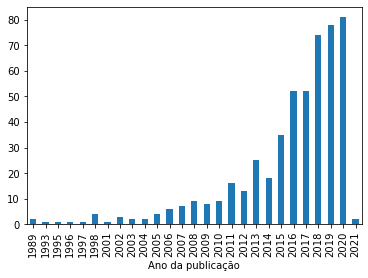

In [7]:
df_data1.groupby('Ano da publicação')['Título'].nunique().plot(kind='bar')
plt.show()

In [8]:
new_data_1 = pd.melt(df_data1, id_vars=['Título','Autores','Autorias compartilhadas', 'Editores', 'Editores de livros', 'Título da fonte',  'Data de publicação', 'Ano da publicação',  'Volume',  'Edição', 'Número da edição',  'Suplemento', 'Edição especial', 'Página inicial',  'Página final', 'Número do artigo', 'DOI', 'Título da conferência', 'Data da conferência', 'Total de citações', 'Média por ano'], value_vars=['1945','1946','1947','1948','1949','1950','1951','1952','1953','1954','1955','1956','1957','1958','1959','1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
new_data_1.fillna(0)
#new_data_1['Edição'] = new_data_1['Edição'].fillna(0)
#new_data_1.info()

,Título,Autores,Autorias compartilhadas,Editores,Editores de livros,Título da fonte,Data de publicação,Ano da publicação,Volume,Edição,...,Página inicial,Página final,Número do artigo,DOI,Título da conferência,Data da conferência,Total de citações,Média por ano,variable,value
0,Comparative energy life-cycle analyses of micr...,"Jorquera, Orlando; Kiperstok, Asher; Sales, Em...",0.0,0.0,0.0,BIORESOURCE TECHNOLOGY,FEB 2010,2010,101.0,4,...,1406.0,1413,0,10.1016/j.biortech.2009.09.038,0,0,459,"38,25",1945,0
1,Microalgae as feedstock for biodiesel producti...,"Francisco, Erika C.; Neves, Debora B.; Jacob-L...",0.0,0.0,0.0,JOURNAL OF CHEMICAL TECHNOLOGY AND BIOTECHNOLOGY,MAR 2010,2010,85.0,3,...,395.0,403,0,10.1002/jctb.2338,0,0,293,"24,42",1945,0
2,Potential carbon dioxide fixation by industria...,"Sydney, Eduardo Bittencourt; Sturm, Wilerson; ...",0.0,0.0,0.0,BIORESOURCE TECHNOLOGY,AUG 2010,2010,101.0,15,...,5892.0,5896,0,10.1016/j.biortech.2010.02.088,0,0,254,"21,17",1945,0
3,Screening Microalgae Strains for Biodiesel Pro...,"Nascimento, Iracema Andrade; Izabel Marques, S...",0.0,0.0,0.0,BIOENERGY RESEARCH,MAR 2013,2013,6.0,1,...,1.0,13,0,10.1007/s12155-012-9222-2,0,0,225,25,1945,0
4,Isolation and selection of microalgae from coa...,"de Morais, Michele Greque; Vieira Costa, Jorge...",0.0,0.0,0.0,ENERGY CONVERSION AND MANAGEMENT,JUL 2007,2007,48.0,7,...,2169.0,2173,0,10.1016/j.enconman.2006.12.011,0,0,220,"14,67",1945,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,COMPOSITIONAL CHARACTERIZATION AND TRANSESTERI...,"da Conceicao, Rosana Coelho; Frasao, Camila Vi...",0.0,0.0,0.0,QUIMICA NOVA,2012,2012,35.0,7,...,1336.0,1342,0,10.1590/S0100-40422012000700010,0,0,0,0,2021,0
39035,CULTIVE OF THE MARINE MICROALGAE Chaetoceros c...,"Pereira Shei, Marcelo Roberto; Sallet Barreto,...",0.0,0.0,0.0,BOLETIM DO INSTITUTO DE PESCA,2008,2008,34.0,4,...,563.0,569,0,0,0,0,0,0,2021,0
39036,Artemia growth submitted to diets of flocculat...,"Rabay, S. G.; Paredes, J. F.",0.0,0.0,0.0,JOURNAL OF COASTAL RESEARCH,WIN 2006,2006,0.0,0,...,1106.0,1109,0,0,0,0,0,0,2021,0
39037,CULTURE OF BRACHIONUS-PLICATILIS (MULLER) WITH...,"BARENHO, DH; PERFETO, PNM; MACADA, AD",0.0,0.0,0.0,ARQUIVOS DE BIOLOGIA E TECNOLOGIA,JUN 1995,1995,38.0,2,...,513.0,520,0,0,0,0,0,0,2021,0


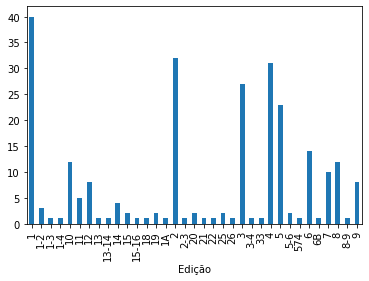

In [9]:
new_data_1.groupby('Edição')['Título da fonte'].nunique().plot(kind='bar')
plt.show()

In [10]:
%matplotlib inline
stopwords = set(STOPWORDS)
text_snippet= " ".join(review for review in new_data_1['Título'].astype(str))

In [11]:
blob = TextBlob(text_snippet)
word_list = []
for p in blob.tags:
    if p[1]=='NN':
        word_list.append(p[0])


In [12]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=30,
                      max_font_size=40,
                      random_state=42).generate(str(text_snippet))

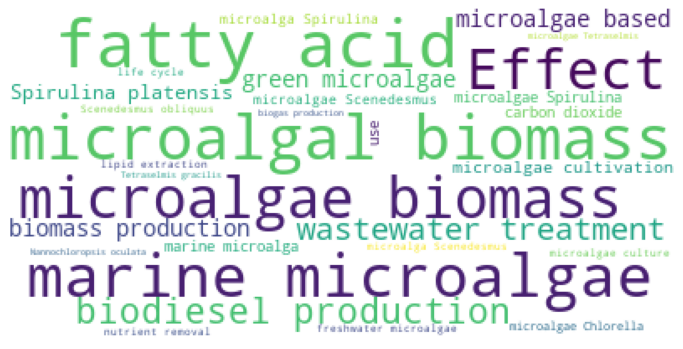

In [13]:
fig = plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off');

In [14]:
df_data2
#.groupby('Ano da publicação')['Título'].nunique().plot(kind='bar')
#plt.show()


,Publication Type,Authors,Author Full Names,Article Title,Source Title,Language,Document Type,Author Keywords,Keywords Plus,Abstract,...,Number of Pages,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export
0,J,"Jorquera, O| Kiperstok, A| Sales, EA| Embirucu...","Jorquera, Orlando| Kiperstok, Asher| Sales, Em...",Comparative energy life-cycle analyses of micr...,BIORESOURCE TECHNOLOGY,English,Article,Photobioreactors| Oil production| Microalgae| ...,MASS CULTIVATION| CULTURE| SYSTEM| OPTIMIZATIO...,An analysis of the energy life-cycle for produ...,...,8,Agricultural Engineering| Biotechnology & Appl...,Agriculture| Biotechnology & Applied Microbiol...,523KJ,WOS:000272071800045,19800784.0,NaN,NaN,NaN,2021-01-01
1,J,"Francisco, EC| Neves, DB| Jacob-Lopes, E| Fran...","Francisco, Erika C.| Neves, Debora B.| Jacob-L...",Microalgae as feedstock for biodiesel producti...,JOURNAL OF CHEMICAL TECHNOLOGY AND BIOTECHNOLOGY,English,Article,photobioreactor| microalgae| carbon dioxide se...,CHLORELLA-PROTOTHECOIDES| BIOMASS PRODUCTION| ...,BACKGROUND: The novelty of this work is the es...,...,9,Biotechnology & Applied Microbiology| Chemistr...,Biotechnology & Applied Microbiology| Chemistr...,571DZ,WOS:000275733000013,NaN,NaN,NaN,NaN,2021-01-01
2,J,"Sydney, EB| Sturm, W| de Carvalho, JC| Thomaz-...","Sydney, Eduardo Bittencourt| Sturm, Wilerson| ...",Potential carbon dioxide fixation by industria...,BIORESOURCE TECHNOLOGY,English,Article,Microalgae| Carbon dioxide fixation| Lipids| N...,CHLORELLA SP| CO2| CULTIVATION| CULTURES| GROW...,The present study aimed at investigating the c...,...,5,Agricultural Engineering| Biotechnology & Appl...,Agriculture| Biotechnology & Applied Microbiol...,601CP,WOS:000278035900022,20350804.0,NaN,NaN,NaN,2021-01-01
3,J,"Nascimento, IA| Marques, SSI| Cabanelas, ITD| ...","Nascimento, Iracema Andrade| Izabel Marques, S...",Screening Microalgae Strains for Biodiesel Pro...,BIOENERGY RESEARCH,English,Article,Biodiesel quality| Fatty acid profiles| Lipid ...,BOTRYOCOCCUS-BRAUNII| CHLORELLA-VULGARIS| DIES...,The viability of algae-based biodiesel industr...,...,13,Energy & Fuels| Environmental Sciences,Energy & Fuels| Environmental Sciences & Ecology,084EA,WOS:000314518300001,NaN,NaN,NaN,NaN,2021-01-01
4,J,"de Morais, MG| Costa, JAV","de Morais, Michele Greque| Vieira Costa, Jorge...",Isolation and selection of microalgae from coa...,ENERGY CONVERSION AND MANAGEMENT,English,Article,Chlorella| CO2| global warming| Scenedesmus,CO2| FIXATION| GROWTH,Global warming is thought to be caused mainly ...,...,5,Thermodynamics| Energy & Fuels| Mechanics,Thermodynamics| Energy & Fuels| Mechanics,174DQ,WOS:000246921800029,NaN,NaN,NaN,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,J,"da Conceicao, RC| Frasao, CV| da Silva, SMC| d...","da Conceicao, Rosana Coelho| Frasao, Camila Vi...",COMPOSITIONAL CHARACTERIZATION AND TRANSESTERI...,QUIMICA NOVA,Portuguese,Article,biodiesel| compositional characterization| mic...,BIODIESEL PRODUCTION,COMPOSITIONAL CHARACTERIZATION AND TRANSESTERI...,...,7,"Chemistry, Multidisciplinary",Chemistry,991TL,WOS:000307724500010,NaN,DOAJ Gold,NaN,NaN,2021-01-01
503,J,"Shei, MRP| Barreto, OJS| Bonfante, TM| Bastos,...","Pereira Shei, Marcelo Roberto| Sallet Barreto,...",CULTIVE OF THE MARINE MICROALGAE Chaetoceros c...,BOLETIM DO INSTITUTO DE PESCA,Portuguese,Article,Chaetoceros calcitrans| artificial seawater| n...,BIOCHEMICAL-COMPOSITION| GROWTH,The use of microalgae as live food to a wide v...,...,7,Fisheries| Zoology,Fisheries| Zoology,469ON,WOS:000267909300012,NaN,DOAJ Gold,NaN,NaN,2021-01-01
504,J,"Rabay, SG| Paredes, JF","Rabay, S. G.| Paredes, J. F.",Artemia growth submitted to diets of flocculat...,JOURNAL OF COASTAL RESEARCH,English,Article,artemia growth| innovation system| flocculatio...,NaN,Reports to innovation method on Artemia growin..

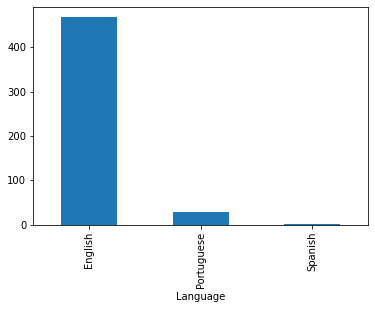

In [15]:
df_data2.groupby('Language')['Authors'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

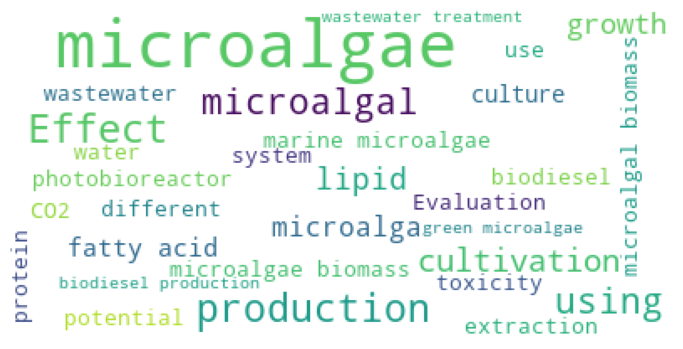

In [16]:
text_snippet_d2 = " ".join(review for review in df_data2['Article Title'].astype(str))

wordcloud_d2 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=30,
                      max_font_size=40,
                      random_state=42).generate(str(text_snippet_d2))
fig = plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_d2)
plt.axis('off');

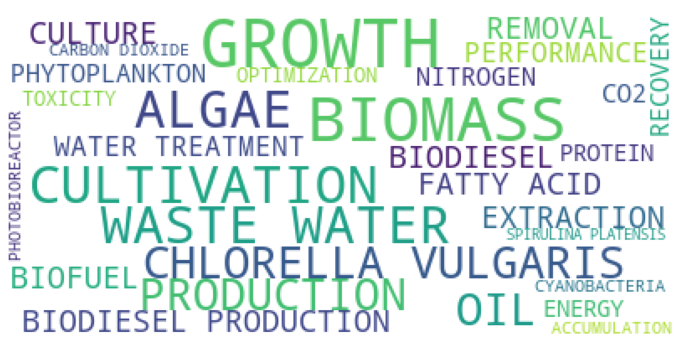

In [17]:
text_snippet_d2_1 = " ".join(review for review in df_data2['Keywords Plus'].astype(str))

wordcloud_d2_1 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=30,
                      max_font_size=40,
                      random_state=42).generate(str(text_snippet_d2_1))
fig = plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_d2_1)
plt.axis('off');

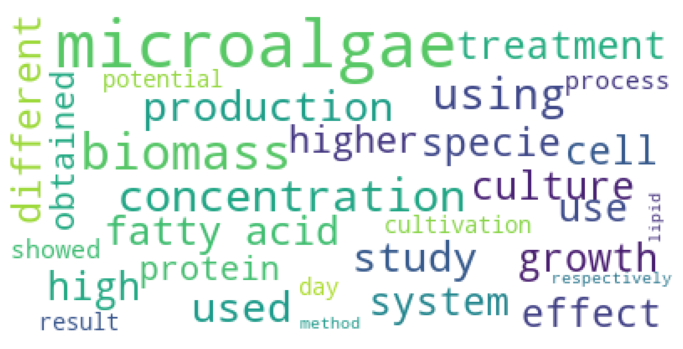

In [18]:

text_snippet_d2_2 = " ".join(review for review in df_data2['Abstract'].astype(str))

wordcloud_d2_2 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=30,
                      max_font_size=40,
                      random_state=42).generate(str(text_snippet_d2_2))
fig = plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud_d2_2)
plt.axis('off');

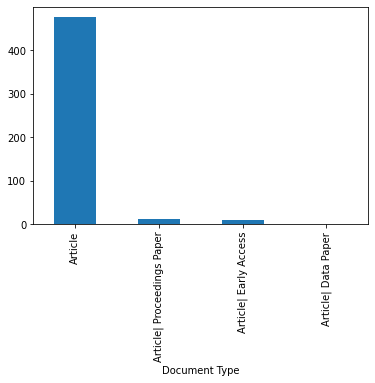

In [19]:
df_data2.groupby('Document Type')['Authors'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

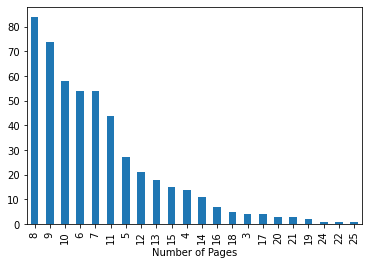

In [20]:
df_data2.groupby('Number of Pages')['Authors'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.show()

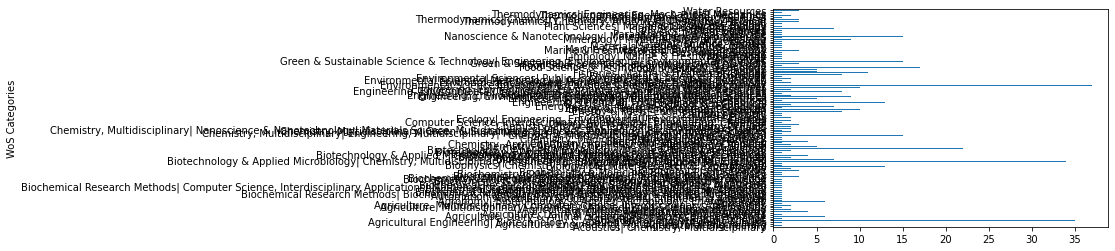

In [21]:
df_data2.groupby('WoS Categories')['Authors'].nunique().plot(kind='barh')
plt.show()
#ax.barh(y=df.Group, width=df.Value);

In [22]:
text = df_data2['Publisher Address'].astype(str) #"United States (New York), United Kingdom (London)" 
for country in pycountry.countries:
    if country.name in text:
        print(country.name)

In [23]:
text

0      THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...
1               111 RIVER ST, HOBOKEN 07030-5774, NJ USA
2      THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...
3                  233 SPRING ST, NEW YORK, NY 10013 USA
4      THE BOULEVARD, LANGFORD LANE, KIDLINGTON, OXFO...
                             ...                        
502      CAIXA POSTAL 26037, 05599-970 SAO PAULO, BRAZIL
503    AV FRANCISCO MATARAZZO, 455, SAO PAULO, SP 050...
504         810 EAST 10TH STREET, LAWRENCE, KS 66044 USA
505    RUA PROF. ALGACYR MUNHOZ - MAEDER, 3775-CIC, 8...
506    P B 8005 C V RAMAN AVENUE, BANGALORE 560 080, ...
Name: Publisher Address, Length: 507, dtype: object

In [24]:
text2 = "askjasd kans d United Kingdom"
for country in pycountry.countries:
    if country.name in text2:
        print(country.name)
        
for country in pycountry.countries:
    if country.name in text2:
        print(country.name)        


United Kingdom
United Kingdom


In [25]:
#pycountry.countries.search_fuzzy('ENGLAND')
#import geograpy
#url='https://en.wikipedia.org/wiki/2012_Summer_Olympics_torch_relay'
#places = geograpy.get_geoPlace_context(text = 'Univ Estadual Campinas, Sch Chem Engn, BR-13083970 Campinas, SP, Brazil' )
#print(places)
#text = df_data2['Publisher Address'].astype(str) #"United States (New York), United Kingdom (London)" 
#for country in pycountry.countries:
#    if country.name in text:
#        print(country.name)
#df_data2['country_address'] = df_data2['Addresses'].rsplit(',', 1)

In [26]:
#f = lambda x: pd.x["Addresses"].rsplit(',',n=1)[-1]
#df_data2.fillna('non,non')
#df_data2['Addresses'][0].rsplit(',')[-1]

In [27]:
df_data2["country_address"] = df_data2['Addresses'].str.rsplit(',').str[-1]
df_data2["country_address"].fillna('NonRg')

0       Brazil
1       Brazil
2        India
3       Brazil
4       Brazil
        ...   
502     Brazil
503     Brazil
504     Brazil
505      NonRg
506      NonRg
Name: country_address, Length: 507, dtype: object

In [28]:
#function to get longitude and latitude data from country name
import geopy 
from geopy.geocoders import Nominatim
geopy.geocoders.options.default_user_agent = "thesys"
geolocator = Nominatim()
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [29]:
df_data2.groupby(['country_address'])['country_address'].count()
df_data2['country_address'] = df_data2['country_address'].str.lower()
df_data2.groupby(['country_address'])['country_address'].count()

country_address
 armenia              1
 australia            2
 austria              1
 belgium              2
 brazil             413
 bulgaria             1
 ca 92093 usa         1
 ca 92103 usa         1
 ca 95616 usa         1
 ca usa               2
 canada               1
 chile                7
 colombia             1
 ecuador              1
 england              5
 fl 32310 usa         8
 fl 32653 usa         1
 france               4
 il 60607 usa         1
 in 47907 usa         1
 india                2
 italy                4
 ma 01821 usa         1
 mi 48824 usa         1
 mn 55108 usa         1
 mn 55455 usa         1
 netherlands          3
 new zealand          2
 pa 15213 usa         1
 peoples r china      1
 peru                 2
 portugal             8
 sc 29208 usa         1
 scotland             1
 south africa         1
 spain               12
 sweden               2
 switzerland          1
 tx 77005 usa         1
 va 23062 usa         1
 vietnam              1


In [43]:
#df_data2['country_address'] = df_data2['country_address'].apply(lambda x: "usa" if "usa" in x else x)
#df_data2["country_address"][df_data2['country_address'].str.contains("usa")] = "Long"
#df_data2["country_address"][df_data2['country_address'].str.contains("china")] = "Short"
#df["B"] = df["A"].map(lambda x: "Long" if "BULL" in x else "Short" if "BEAR" in x else "")
#df_data2[df_data2['country_address'].str.contains("usa", na=False)]·
#print('usa' if df_data2[df_data2['country_address'].str.contains("usa", na=False)] else df_data2[df_data2['country_address']])
#df_data2['country_address'] = (df_data2['country_address'].str.contains("usa", na=False), 'usa', 'no ')
#df_data2.loc[df_data2['country_address'] in 'usa', 'country_address'] = 'Match' 
#df_data2.loc[df_data2['country_address'].str.contains('usa'), 'country_address'] = 'usa'

df_data2['country_address'] = df_data2['country_address'].str.strip()
df_data2.loc[df_data2['country_address'].str.contains('usa', na=False), 'country_address'] = 'US'
df_data2.loc[df_data2['country_address'].str.contains('china', na=False), 'country_address'] = 'china'
df_map.loc[df_map['country_address'].str.contains('england', na=False), 'country_address'] = 'United Kingdom'
df_map.loc[df_map['country_address'].str.contains('scotland', na=False), 'country_address'] = 'United Kingdom'


In [44]:
df_data2['country_address'] = df_data2['country_address'].str.capitalize() #.apply(lambda x: x.upper())
#df_data2['country_address'].capitalize()
#df_data2.dtypes

In [45]:
df_data2['country_address']

0      Brazil
1      Brazil
2       India
3      Brazil
4      Brazil
        ...  
502    Brazil
503    Brazil
504    Brazil
505       NaN
506       NaN
Name: country_address, Length: 507, dtype: object

In [46]:
df_map = df_data2.groupby(["country_address"])['country_address'].count().reset_index(name="Reports")

In [47]:
#df_map

In [48]:
import pycountry_convert as pc
#from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    #print(col)
    try:
        #print(col)
        cn_a2_code =  pc.country_name_to_country_alpha2(col, cn_name_format="default")
    except:
        #print(col)
        cn_a2_code = 'Unknown'
    #try:
    #    cn_continent = pc.country_alpha2_to_continent_code(cn_a2_code)
    #except:
    #    cn_continent = 'Unknown' 
    #return (cn_a2_code, cn_continent)
    return (cn_a2_code)

In [49]:
#df_map['a'] = get_continent(df_map['country_address'])
df_map['a'] = df_map.apply(lambda x: get_continent(x['country_address']),axis=1)

#def custom_rating(genre,rating):
#    if 'Thriller' in genre:
#        return min(10,rating+1)
#    elif 'Comedy' in genre:
#        return max(0,rating-1)
#    else:
#        return rating
#df['CustomRating'] = df.apply(lambda x: custom_rating(x['Genre'],x['Rating']),axis=1)


#df_map["1", "2"].apply(lambda x: get_continent(x))
#get_continent('Brazil')

#pc.country_name_to_country_alpha2(df_map['country_address'])
#country_name_to_country_alpha2('germany')
#country_alpha2_to_continent_code('DE')
#map_countries(cn_name_format="chile", cn_extras={})
#t = pycountry.countries.search_fuzzy('china')
#print(t)

#country_code = pc.country_name_to_country_alpha2("New Zealand", cn_name_format="default")
#print(country_code)
#continent_name = pc.country_alpha2_to_continent_code(country_code)
#print(continent_name)


In [50]:


df_map.loc[df_map['country_address'].str.contains('zealand', na=False), 'country_address'] = 'New Zealand'

df_map.loc[df_map['country_address'].str.contains('South africa', na=False), 'country_address'] = 'South Africa'
df_map.loc[df_map['country_address'].str.contains('Us', na=False), 'country_address'] = 'US'
df_map


,country_address,Reports,a
0,Armenia,1,AM
1,Australia,2,AU
2,Austria,1,AT
3,Belgium,2,BE
4,Brazil,414,BR
5,Bulgaria,1,BG
6,Canada,1,CA
7,Chile,7,CL
8,China,1,CN
9,Colombia,1,CO


In [38]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Country'],
                                   df.iloc[i]['User_Percent']
                                   )
        folium.CircleMarker(
            location = [lat, long], radius=radius, popup= popup_text, fill=True).add_to(marker_cluster)
#show the map
world_mapq

NameError: name 'df' is not defined

In [ ]:
df_map = get_continent(df_data2.groupby(['country_address'])['country_address'].count())

In [41]:
t = pycountry.countries.search_fuzzy('scotland')
print(t)

[Country(alpha_2='GB', alpha_3='GBR', name='United Kingdom', numeric='826', official_name='United Kingdom of Great Britain and Northern Ireland')]


In [ ]:
df_data2['country_address']

In [ ]:
def process_result_value(self, value, dialect):
        if value:
            return pycountry.countries.get(alpha_3=value)

        return value 

In [ ]:
print(process_result_value('chile', 'cl'))

In [ ]:
t = pycountry.countries.search_fuzzy('chile')
#len(t)
for i in range(len(t)):
  print(t[i].alpha_2,
  t[i].alpha_3,
  t[i].name ,
  t[i].numeric,
  t[i].official_name)
  print("\n --- \n")

In [ ]:
def get_the_country(value):
    t = pycountry.countries.search_fuzzy(value)
    #len(t)
    try:
        print('1')
        for i in range(len(t)):
            print('2')
          #print(t[i].alpha_2,t[i].alpha_3,t[i].name ,t[i].numeric,t[i].official_name) print("\n --- \n")
            if value in t[i].name:
                print('3')
                return t[i].name
    except:
        return 'Ups..' 
   

In [ ]:
get_the_country('chilsde')